# Sequential Data Modeling

Sequential Data: 데이터의 순서가 중요한 데이터

MLP의 경우는 순서를 고려하지 않고 **모든 데이터 간의 관계**를 파악하는 데 집중 <br>
CNN의 경우 순서를 고려하지 않고 **특정 범위 내의 관계**를 파악하는 데 집중 <br>
따라서, **순서 정보가 중요한 데이터를 모델링하기 위한 구조의 필요성**이 대두됨 <br>


## LSTM (Long Short Term Memory)

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*tEN1Ziu4VvRAaH9zagN3EQ.png" width="600" height="300"/>

<br>
<br>

RNN의 문제점을 해결하기 위해 등장한 Cell <br>
Input gate, forget gate, output gate의 gate를 사용하여 정보 업데이트 <br>

<br>
<br>

<font style="font-size:20px"> 구조 </font> <br>
<font style="font-size:16px"> Forget Gate </font> <br>
<img src="https://wikidocs.net/images/page/160053/10_LSTM3-focus-f.png" width="600" height="300"/>

셀 상태에서 버릴 정보 결정 <br>
Sigmoid를 통해 0이면 제거, 1이면 유지, 그 사이면 그 비율 만큼을 유지 <br>

<br>

<font style="font-size:16px"> Input Gate </font> <br>
<img src="https://wikidocs.net/images/page/160053/11_LSTM3-focus-i.png" width="600" height="300"/>

이젠 셀 상태($C_{t-1}$)을 새 셀 상태($C_t$)로 업데이트 <br>
$i_t*\tilde{C_t}$의 정보량을 추가 <br>
&nbsp;&nbsp;&nbsp;&nbsp; $i_t$: $x_t$에서 어느 정도 비율을 업데이트 할 지 결정 <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\tilde{C_t}$: $x_t$에서 입력된 값을 -1 ~ 1로 스케일링 <br>

<br>

<font style="font-size:16px"> Output Gate </font> <br>
셀 상태($C_t$)에서 어느 정도를 출력할지 결정 <br>
<img src="https://wikidocs.net/images/page/160053/13_LSTM3-focus-o.png" width="600" height="300"/>

$o_t$: 입력된 값을 통해 $C_t$에서 어느 정도의 양을 출력할 지 결정 <br>
$tanh(C_t)$: $C_t$를 -1 ~ 1로 스케일링 <br>

<br>
<br>

<font style="font-size:20px"> 장점 </font> <br>

1. RNN의 학습 불안정(기울기 소실, 폭발) 문제 일부 극복
2. 장기 정보를 RNN보다 더욱 잘 캡처

<br>

<font style="font-size:20px"> 단점 </font> <br>

1. 완벽하게 해결하지는 못 함

### 사용 방법

> ```python
> import torch.nn as nn
> 
> lstm = nn.LSTM(
>    input_size,
>    hidden_size,
>    num_layers=,
>    bidirectional=False,
>    batch_first=True,
> )
> output, (h_n, c_n) = lstm(x)      # (초기 hidden state를 주지 않을 때)
> output, (h_n, c_n) = lstm(x, h_0) # (초기 hidden state를 줄 때)
> 
> # x: 입력 텐서 (batch, seq_len, n_feature)
> # output: 매 t에 대한 output layer
> # h_n: final hidden state
> # c_n: final cell state
> ```

<br>

<font style="font-size:16px"> 주요 parameter </font> <br>
- input_size (int): 입력 tensor의 크기 (feature의 수)
- hidden_size (int): hidden state의 neuron의 수
- num_layers (int): stack의 수
- bidirectional (bool): bidirectional LSTM 유무
- batch_first (bool): shape에서 batch를 제일 처음으로 둘 건지 결정
    - True: (batch, seq_len, n_feature)
    - False: (seq_len, batch, n_feature)

## Variants

LSTM 구조의 다양한 변형 <br>
외에도 수많은 종류가 있으며 퍼포먼스는 비슷하나 일부 특정 task에 적합한 구조가 있는 것으로 발혀짐 <br>

### Peephole

<img src="https://wikidocs.net/images/page/160053/14_LSTM3-var-peepholes.png" width="600" height="300"/>

### Combined forget and input gate

<img src="https://wikidocs.net/images/page/160053/15_LSTM3-var-tied.png" width="600" height="300"/>

### GRU (Gated Recurrent Unit)

RNN Variant의 하나로 LSTM에서 세 개의 gate를 보다 간소화 <br>
Update gate와 reset gate를 활용하여 정보 업데이트 <br>
LSTM의 cell state와 hidden state가 hidden state로 통합 <br>

<br>
<br>

<font style="font-size:20px"> 구조 </font> <br>

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-ldMy6GqBy8D25uNKQl2gA.png" width="600" height="300"/>


<font style="font-size:16px"> Reset Gate (a) </font> <br>

잊을 정보량 결정


<br>

<font style="font-size:16px"> Update Gate (b) </font> <br>


이전 step의 hidden state의 정보를 현재 상태에 얼마나 반영할 것인지 결정 <br>
0에 가까울 수록 이전 hidden state의 정보는 잊혀지고 1에 가까우면 현재의 hidden state 정보 유지 <br>
그림의 -는 정보를 1에서 뺀다는 의미로 제거량 의미






<br>
<br>

<font style="font-size:20px"> 장점 </font> <br>

1. LSTM 대비 적은 parameter로 보다 빠른 학습 속도

<br>

<font style="font-size:20px"> 단점 </font> <br>

1. 일부 task에서 긴 시퀀스 데이터에서 LSTM대비 장기 의존성 유지 어려움 

#### 사용 방법

> ```python
> import torch.nn as nn
> 
> gru = nn.GRU(
>    input_size,
>    hidden_size,
>    num_layers=,
>    bidirectional=False,
>    batch_first=True,
> )
> output, h_n = gru(x)      # (초기 hidden state를 주지 않을 때)
> output, h_n = gru(x, h_0) # (초기 hidden state를 줄 때)
> 
> # x: 입력 텐서 (batch, seq_len, n_feature)
> # output: 매 t에 대한 output layer
> # h_n: final hidden state
> ```

<br>

<font style="font-size:16px"> 주요 parameter </font> <br>
- input_size (int): 입력 tensor의 크기 (feature의 수)
- hidden_size (int): hidden state의 neuron의 수
- num_layers (int): stack의 수
- bidirectional (bool): bidirectional LSTM 유무
- batch_first (bool): shape에서 batch를 제일 처음으로 둘 건지 결정
    - True: (batch, seq_len, n_feature)
    - False: (seq_len, batch, n_feature)

# Summary

|Cell|Structure|
|---|----|
|RNN|<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*iP_ahgzkiMNu2hPYhkjlXw.png" width="600" height="300"/>|
|LSTM|<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*tEN1Ziu4VvRAaH9zagN3EQ.png" width="600" height="300"/>|
|GRU|<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-ldMy6GqBy8D25uNKQl2gA.png" width="600" height="300"/>|

# Practice

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence

## LSTM

In [4]:
x = torch.randn(32, 20, 64)
x.shape

torch.Size([32, 20, 64])

In [11]:
rnn = nn.RNN(64, 200, batch_first=True)
output, h_n = rnn(x)
output.shape

torch.Size([32, 20, 200])

In [12]:
h_n.shape

torch.Size([1, 32, 200])

In [13]:
lstm = nn.LSTM(64, 200, batch_first=True)
output, h_n = lstm(x)
output.shape

torch.Size([32, 20, 200])

In [16]:
len(h_n)

2

In [18]:
h_n[0].shape    # 제일 마지막 hidden_state

torch.Size([1, 32, 200])

In [19]:
h_n[1].shape    # 제일 마지막 cell_state

torch.Size([1, 32, 200])

In [ ]:
lstm = nn.LSTM(64, 200, batch_first=True)
output, (h_n, c_n) = lstm(x)    # h_n, c_n을 사용할 때
output, _ = lstm(x)             # h_n, c_n을 사용하지 않을 때

## GRU

In [23]:
x = torch.randn(32, 20, 64)

In [25]:
gru = nn.GRU(64, 200, batch_first=True)
output, h_n = gru(x)

display(output.shape)
display(h_n.shape)

torch.Size([32, 20, 200])

torch.Size([1, 32, 200])

In [ ]:
# 삼성 주식데이터 2023의 데이터 활용
# 시가, 고가, 종가, 저가, 거래량 다섯 개의 컬럼을 활용
samsung = pd.read_csv(
    './data/samsung_2023.csv',
    encoding='cp949',
    usecols=['일자', '시가', '고가', '종가', '저가', '거래량'],
)
samsung.일자 = pd.to_datetime(samsung.일자)
samsung = samsung.sort_values(by=['일자'])
samsung = samsung.set_index('일자')
# 전일 10일의 데이터를 통하여 다음 5일의 종가 예측
# 1. 데이터 전처리  (X, y) 생성, train, valid, test
train, temp = train_test_split(samsung, test_size=0.4, shuffle=False, random_state=0)
valid, test = train_test_split(temp, test_size=0.5, shuffle=False, random_state=0)

standard_scaler = StandardScaler()
train.loc[:] = standard_scaler.fit_transform(train)
valid.loc[:] = standard_scaler.transform(valid)
test.loc[:] = standard_scaler.transform(test)

window_size = 10
output_dim = 5

# X.shape -> (batch_size, seq_len, dim)
x_train = np.lib.stride_tricks.sliding_window_view(
    train.iloc[:-output_dim], window_size, axis=0).transpose(0, 2, 1)
y_train = np.lib.stride_tricks.sliding_window_view(
    train.종가.iloc[window_size:], output_dim
)
x_valid = np.lib.stride_tricks.sliding_window_view(
    valid.iloc[:-output_dim], window_size, axis=0).transpose(0, 2, 1)
y_valid = np.lib.stride_tricks.sliding_window_view(
    valid.종가.iloc[window_size:], output_dim, axis=0
)  
x_test = np.lib.stride_tricks.sliding_window_view(
    test.iloc[:-output_dim], window_size, axis=0).transpose(0, 2, 1)
y_test = np.lib.stride_tricks.sliding_window_view(
    test.종가.iloc[window_size:], output_dim, axis=0
)

# 2. LSTM cell 정의
lstm = nn.LSTM(
    5,
    32,
    batch_first=True,
)

x_train = torch.Tensor(x_train)
x, _ = lstm(x_train)

# 3. 다음 5일의 종가를 맞추기 위한 전처리 및 셀 구성
x = x.flatten(start_dim=1)
linear = nn.Linear(320, 5)
output = linear(x)

In [22]:
output.shape

torch.Size([133, 5])

## IMDB

In [23]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [24]:
# x_train이 가지고 있는 전체 문장: 25000
# 25000개의 문장 중에서 길이가 가장 긴 문장의 단어 수가 몇 개인지 찾는 코드 작성
max([len(sentence) for sentence in x_train])

2494

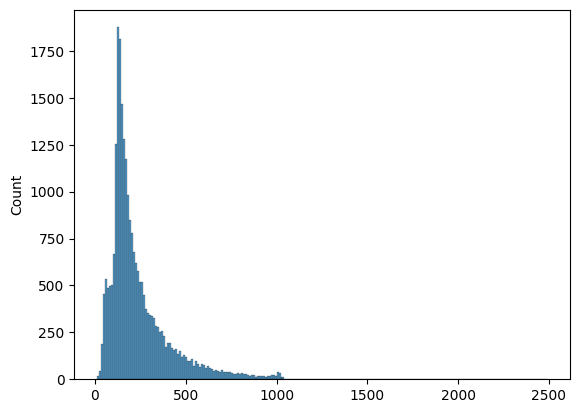

In [26]:
# 길이 분포 확인 -> 문장의 최대 길이 정의
sns.histplot([len(sentence) for sentence in x_train])

In [31]:
# 200보다 길이가 긴 문장은 200개로 잘라서 사용
max_len = 200
x_train = [torch.Tensor(sequence[:max_len]).long() for sequence in x_train]
x_test = [torch.Tensor(sequence[:max_len]).long() for sequence in x_test]

In [32]:
# max_len보다 작은 문장을 max_len으로 맞춤
x_train = pad_sequence(x_train, batch_first=True)
x_test = pad_sequence(x_test, batch_first=True)

In [52]:
embedding = nn.Embedding(10000, 128)
x = embedding(x_train[:32])

In [47]:
x.shape

torch.Size([32, 200, 128])

In [53]:
# embedding 된 데이터를 lstm을 통해 학습
lstm = nn.LSTM(128, 128, batch_first=True, bidirectional=True)
x, _ = lstm(x)
# batch normalization 사용하지 않음
x.shape

torch.Size([32, 200, 256])

In [59]:
# flatten
x = x.flatten(start_dim=1)
x.shape

torch.Size([32, 51200])

In [60]:
# flatten 데이터를 linear를 통해 학습
linear1 = nn.Linear(51200, 128)
x = linear1(x)
# 여기에는 dropout 사용 가능
linear2 = nn.Linear(128, 2)
x = linear2(x)
# 여기에는 dropout 사용 불가능
x.shape

torch.Size([32, 2])

In [67]:
F.cross_entropy(x, torch.Tensor(y_train[:32]).long())

tensor(0.7002, grad_fn=<NllLossBackward0>)

In [ ]:
## 위의 코드를 바탕으로 module 코드 수정
# 1. imdb dataset 전처리
#    max_len: 200, padding, validation set 생성
# 2. dataset, lightningdatamodule 구성
# 3. model (lstm)
    # dropout 사용 (p=0.3)
    # Embedding
        # input: 10000, dim: 128
    # LSTM 2개
        # bidirectional
        # layer1: 128 -> 256
        # layer2: ?   -> 64
    # Linear 3개
        # layer1: ? -> 512
        # layer2: 512 -> 128
        # layer3: 128 -> 2
# 4. lightningmodule
    # classification task에 맞게 수정
    # self.log를 통해서 정확도 산출